In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset
from tensorflow.keras.models import Model
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix

from PIL import Image
from PIL import UnidentifiedImageError

In [ ]:
ak = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak')
ala_idris = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris')
buzgulo = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu')
dimnit = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit')
nazli = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli')

In [ ]:
# Qual é a resolução das imagens deste dataset?
img1 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png")
img2 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (1).png")
img3 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (1).png")
img4 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (1).png")
img5 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (1).png")

print('Resposta questão 2a:')
print(f'Resolução das folhas tipo "Ak": {img1.size} pixels\nResolução das folhas tipo "Ala Idris": {img2.size} pixels\nResolução das folhas tipo "Buzgulu":{img3.size} pixels\nResolução das folhas tipo "Dimnit":{img4.size} pixels\nResolução das folhas tipo "Nazli":{img5.size} pixels')

Resposta questão 2a:
Resolução das folhas tipo "Ak": (511, 511) pixels
Resolução das folhas tipo "Ala Idris": (511, 511) pixels
Resolução das folhas tipo "Buzgulu":(511, 511) pixels
Resolução das folhas tipo "Dimnit":(511, 511) pixels
Resolução das folhas tipo "Nazli":(511, 511) pixels


In [ ]:
imgw, imgh = 224,224 #tamanho final da imagem
X=[]
X_ml =[]
y=[]

In [ ]:
for i in ak:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(0)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in ala_idris:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(1)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in buzgulo:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(2)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in dimnit:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(3)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in nazli:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(4)
  except UnidentifiedImageError:
    pass

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)
print(f'O tamanho das imagens transformado é: {X.shape[1]} pixels de largura e {X.shape[2]} pixels de altura')

(500, 224, 224, 3) (500,)
O tamanho das imagens transformado é: 224 pixels de largura e 224 pixels de altura


In [ ]:
# Quantas imagens por classe?
a = []
y = np.array(y)
__ , counts = np.unique(y, return_counts=True)
print(f'O número de amostras presentes nas folhas "Ak" é: {counts[0]}')
print(f'O número de amostras presentes nas folhas "Ala Idris" é: {counts[1]}')
print(f'O número de amostras presentes nas folhas "Buzgulu" é: {counts[2]}')
print(f'O número de amostras presentes nas folhas "Dimnit" é: {counts[3]}')
print(f'O número de amostras presentes nas folhas "Nazli" é: {counts[4]}')

O número de amostras presentes nas folhas "Ak" é: 100
O número de amostras presentes nas folhas "Ala Idris" é: 100
O número de amostras presentes nas folhas "Buzgulu" é: 100
O número de amostras presentes nas folhas "Dimnit" é: 100
O número de amostras presentes nas folhas "Nazli" é: 100


In [ ]:
#normalização (aplicação de um filtro rgb)
x = X.astype('float32')
x /= 255

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state = 10)

In [ ]:
Ytrain = to_categorical(ytrain)
Ytest = to_categorical(ytest)

In [ ]:
print('\tTraining set shape: ', Xtrain.shape)
print('\tTesting set shape: ', Xtest.shape)
print('\tTraining label shape: ', ytrain.shape)
print('\tTesting label shape: ', ytest.shape)

	Training set shape:  (400, 224, 224, 3)
	Testing set shape:  (100, 224, 224, 3)
	Training label shape:  (400,)
	Testing label shape:  (100,)


# Questão 1) Escolha uma rede pré-treinada em imagens para fazer transferência de aprendizado por meio de fine-tuning (2,5 pontos):

## a) Determine quais camadas serão acrescentadas, o tamanho do batch, a quantidade de épocas e a forma de treinamento (fit ou train_on_batch) (2 pontos).

In [ ]:
print('Loading the InceptionV3 model ...')
# Rede Inception V3
model = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3), classes=1000)
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output) # O modelo para na penultima camada, selecionando apenas as caracteristicas e não as probabilidades

# Novas camadas adicionadas através do fine-tuning
new_top = keras.Sequential()
new_top.add(keras.layers.Flatten())
new_top.add(keras.layers.Dense(20, activation = 'relu'))
new_top.add(keras.layers.Dense(10, activation = 'relu'))
new_top.add(keras.layers.Dense(5, activation = 'softmax'))

model = Model(inputs=model.input, outputs=new_top(model.output))

model.compile(optimizer= keras.optimizers.Adam(0.0001), loss='categorical_crossentropy' ,metrics=[keras.metrics.CategoricalAccuracy(name = 'accuracy')])
history = model.fit(Xtrain, Ytrain, batch_size=10, epochs=15)

Loading the InceptionV3 model ...
Epoch 1/15
40/40 [==============================] - 16s 70ms/step - loss: 1.4768 - accuracy: 0.2700
Epoch 2/15
40/40 [==============================] - 3s 69ms/step - loss: 1.0203 - accuracy: 0.5425
Epoch 3/15
40/40 [==============================] - 3s 70ms/step - loss: 0.5532 - accuracy: 0.7725
Epoch 4/15
40/40 [==============================] - 3s 70ms/step - loss: 0.3277 - accuracy: 0.9300
Epoch 5/15
40/40 [==============================] - 3s 69ms/step - loss: 0.1832 - accuracy: 0.9675
Epoch 6/15
40/40 [==============================] - 3s 69ms/step - loss: 0.1053 - accuracy: 0.9850
Epoch 7/15
40/40 [==============================] - 3s 70ms/step - loss: 0.1268 - accuracy: 0.9650
Epoch 8/15
40/40 [==============================] - 3s 70ms/step - loss: 0.0904 - accuracy: 0.9850
Epoch 9/15
40/40 [==============================] - 3s 69ms/step - loss: 0.0605 - accuracy: 0.9825
Epoch 10/15
40/40 [==============================] - 3s 70ms/step - loss: 

In [ ]:
scoreMLP = model.evaluate(Xtest, Ytest)
print(model.metrics_names)
print("Loss: ", round(scoreMLP[0],3))
print("Accuracy for neural network: ", round(scoreMLP[1],3))

4/4 [==============================] - 3s 125ms/step - loss: 0.5530 - accuracy: 0.8600
['loss', 'accuracy']
Loss:  0.553
Accuracy for neural network:  0.86


In [ ]:
print('Loading the InceptionV3 model with feature extraction ...')
model_1 = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3), classes=1000)
model_1 = Model(inputs=model_1.input, outputs=model_1.get_layer(index=-2).output) # O modelo para na penultima camada, selecionando apenas as caracteristicas e não as probabilidades
model_1.summary()

prediction = np.array(model_1.predict(X))
x_pred = np.reshape(prediction, (prediction.shape[0], np.prod([prediction.shape[1],prediction.shape[2],prediction.shape[3]])))

print('\tFeatures in x prediction: ', x_pred.shape)

Loading the InceptionV3 model with feature extraction ...
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  ) 

In [ ]:
Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(x_pred,y, test_size=0.1, random_state = 10)

In [ ]:
print('\tTraining set shape: ', Xtrain_1.shape)
print('\tTesting set shape: ', Xtest_1.shape)

	Training set shape:  (450, 4800)
	Testing set shape:  (50, 4800)


In [ ]:
estimators = [GaussianNB(), BernoulliNB(), ComplementNB()]
def gridnb(estimator, xtrain, ytrain, xtest, ytest):
  results = []
  result_pred = []
  #O Naive Bayes não possui muitos parâmetros para serem implementados nas suas funções, mas para que seja utilizado o cross validation é necessário implementar um grid nulo, apenas para ele utilizar
  #as configurações padrões da classe
  grid_nb = {}
  for i in estimators:
    nb = GridSearchCV(estimator=i, param_grid=grid_nb, cv = 10)
    nb.fit(xtrain, ytrain)
    result = nb.predict(xtest)
    result_pred.append(result)
    accnb = accuracy_score(result, ytest)
    results.append(accnb)
  max_acc = max(results)
  max_acc_model = str(estimators[results.index(max_acc)]).strip('()')
  results_best_model = result_pred[results.index(max_acc)]
  return max_acc, max_acc_model, results_best_model

In [ ]:
grid_dt = {
    'random_state' : [10, 20],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth': [i for i in range(1,10)],
}
dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt, cv = 20)

In [ ]:
pca = PCA(n_components = .9, svd_solver = 'full')
Xtrain1 = pca.fit_transform(Xtrain_1)
Xtest1 = pca.transform(Xtest_1)
Xtrain1_minmax, Xtrain1_std = MinMaxScaler().fit_transform(Xtrain_1), StandardScaler().fit_transform(Xtrain_1) 
Xtest1_minmax, Xtest1_std = MinMaxScaler().fit_transform(Xtest_1), StandardScaler().fit_transform(Xtest_1)

In [ ]:
print("Classification with Decision Tree ...")
dt.fit(Xtrain1_std, ytrain_1)
result = dt.predict(Xtest1_std)

accdt = accuracy_score(result, ytest_1)
print(f"\tAccuracy Decision Tree: {accdt:0.4f}")
print('\tBest parameters:')
print('\t', {str(dt.best_params_).strip(r"{'}")})

Classification with Decision Tree ...
	Accuracy Decision Tree: 0.3600
	Best parameters:
	 {"max_depth': 7, 'max_features': 'auto', 'random_state': 10"}


In [ ]:
print('Classification with Naive Bayes...')
max_acc, max_acc_model, results = gridnb(estimators, Xtrain1_minmax, ytrain_1, Xtest1_minmax, ytest_1)

print(f'\tAccuracy Naive Bayes: {max_acc:0.4f}')
print('\tBest Model:', max_acc_model)

Classification with Naive Bayes...
	Accuracy Naive Bayes: 0.5000
	Best Model: ComplementNB


In [ ]:
#avaliação de resultados
if accdt > max_acc:
  best_acc, best_ml_model = accdt, 'Decision Tree'
  print('Best model: Decision Tree')
  print(f'Score: {100*accdt}%', )
  print(f'Diference between Naive Bayes: {100*(accdt - max_acc):.02f}%', )
else:
  best_acc, best_ml_model = accdt, 'Naive Bayes'
  print(f'Best model: {max_acc_model.strip("NB")} Naive Bayes ')
  print(f'Score: {100*max_acc}%', )
  print(f'Difference between Decision Tree: {100*(max_acc - accdt):.02f}%', )

Best model: Complement Naive Bayes 
Score: 50.0%
Difference between Decision Tree: 14.00%


## b) Compare a predição diretamente pela rede com a extração de características (0,5 ponto).

In [ ]:
#Comparação dos resultados
if scoreMLP[1] > best_acc:
  print('Best model: Neural Network')
  print(f'Score: {round(scoreMLP[1],2)}')
  print(f'Diference between Machine Learning model: {100*(scoreMLP[1] - best_acc):.02f}%', )
else:
  print('Best model: Machine Learning')
  print(f'Score: {best_acc}')
  print(f'Diference between Machine Learning model: {100*(best_acc - scoreMLP[1]):.02f}%', )

Best model: Neural Network
Score: 0.86
Diference between Machine Learning model: 50.00%


# Questão 2) Considerando a mesma rede pré-treinada do exercício anterior, faça fine-tuning congelando algumas camadas. Determine a quantidade de camadas a serem congeladas, indique o setup escolhido e compare o resultado obtido em relação ao fine-tuning convencional. (2,5 pontos)

In [ ]:
print('Loading the InceptionV3 model with last 10 layers frozen ...')
# Rede Inception V3
model_freeze = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3), classes=1000)
model_freeze = Model(inputs=model_freeze.input, outputs=model_freeze.get_layer(index=-2).output)

#O setup de congelamento escolhido é o congelamento das ultimas 10 camadas
for layer in model_freeze.layers[:-10]:
    layer.trainable=False

# A mesma da rede fine-tuning normal, pois a comparação só deve ser feita caso a única diferença seja o congelamento.
new_top = keras.Sequential()
new_top.add(keras.layers.Flatten())
new_top.add(keras.layers.Dense(20, activation = 'relu'))
new_top.add(keras.layers.Dense(10, activation = 'relu'))
new_top.add(keras.layers.Dense(5, activation = 'softmax'))

model_freeze = Model(inputs=model_freeze.input, outputs=new_top(model_freeze.output))

model_freeze.compile(optimizer= keras.optimizers.Adam(0.0001), loss='categorical_crossentropy' ,metrics=[keras.metrics.CategoricalAccuracy(name = 'accuracy')])
history_freeze = model_freeze.fit(Xtrain, Ytrain, batch_size=10, epochs=15)

Loading the InceptionV3 model with last 10 layers frozen ...
Epoch 1/15
40/40 [==============================] - 7s 41ms/step - loss: 1.5190 - accuracy: 0.3725
Epoch 2/15
40/40 [==============================] - 1s 28ms/step - loss: 1.0265 - accuracy: 0.6600
Epoch 3/15
40/40 [==============================] - 1s 28ms/step - loss: 0.6835 - accuracy: 0.8000
Epoch 4/15
40/40 [==============================] - 1s 28ms/step - loss: 0.4761 - accuracy: 0.8850
Epoch 5/15
40/40 [==============================] - 1s 28ms/step - loss: 0.2982 - accuracy: 0.9600
Epoch 6/15
40/40 [==============================] - 1s 28ms/step - loss: 0.2292 - accuracy: 0.9700
Epoch 7/15
40/40 [==============================] - 1s 28ms/step - loss: 0.1689 - accuracy: 0.9800
Epoch 8/15
40/40 [==============================] - 1s 28ms/step - loss: 0.1206 - accuracy: 0.9950
Epoch 9/15
40/40 [==============================] - 1s 28ms/step - loss: 0.1026 - accuracy: 0.9875
Epoch 10/15
40/40 [=============================

In [ ]:
scoreMLP_freeze = model_freeze.evaluate(Xtest, Ytest)
print(model_freeze.metrics_names)
print("Loss: ", round(scoreMLP_freeze[0],3))
print("Accuracy for neural network: ", round(scoreMLP_freeze[1],3))

4/4 [==============================] - 2s 39ms/step - loss: 0.5635 - accuracy: 0.8100
['loss', 'accuracy']
Loss:  0.564
Accuracy for neural network:  0.81


In [ ]:
#Comparação entre as redes neurais
if (scoreMLP[1]*2 - scoreMLP[0])/3 > (scoreMLP_freeze[1]*2 - scoreMLP_freeze[0])/3: # É necessário subtrair o loss, pois o loss é uma medida inversamente proporcional, quanto menor, melhor.
  print('Best model: Basic Neural Network')
  print(f'Accuracy score: {round(scoreMLP[1],3)}')
  print(f'Loss score: {round(scoreMLP[0],3)}')
  print(f'Accuracy diference between Frozen Deep Learning model: {100*(scoreMLP[1] - scoreMLP_freeze[1]):.02f}%', )
  print(f'Loss diference between Frozen Deep Learning model: {abs(100*(scoreMLP[0] - scoreMLP_freeze[0])):.02f}%', )
else:
  print('Best model: Last 10 frozen layers Neural Network')
  print(f'Accuracy score: {round(scoreMLP_freeze[1],3)}')
  print(f'Loss score: {round(scoreMLP_freeze[0],3)}')
  print(f'Accuracy diference between Basic Deep Learning model: {100*(scoreMLP_freeze[1] - scoreMLP[1]):.02f}%', )
  print(f'Loss diference between Basic Deep Learning model: {abs(100*(scoreMLP_freeze[0] - scoreMLP[0])):.02f}%', )

Best model: Basic Neural Network
Accuracy score: 0.86
Loss score: 0.553
Accuracy diference between Frozen Deep Learning model: 5.00%
Loss diference between Frozen Deep Learning model: 1.05%


# Questão 3) Considerando a mesma rede pré-treinada do primeiro exercício, faça fine-tuning com Data Augmentation. Explore essas técnicas e verifique se sua utilização melhora a performance do modelo. Não fique restrito às técnicas de exemplo. Estude as demais funções existentes no pacote ImageGenerator. (2,5 pontos)

In [ ]:
def kerasAugmentation(X, Y, augmentation, qtdade):
  print("\tCreating data augmentation usign Keras ...")
  
  images = []
  labels = []
  for augmentation in augmentation:
  # determinando o gerador das imagens a ser utilizado e sua configuração
    if (augmentation == "Rotation"):
      datagen = ImageDataGenerator(rotation_range=90)
    elif (augmentation == "Zoom"):
      datagen = ImageDataGenerator(brightness_range = [0.2, 0.4])
    elif (augmentation == "Brightness"):
      datagen = ImageDataGenerator(zoom_range = [0.2, 0.4])
    elif (augmentation == "Flip"):
      datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
      


    for i in range(0, X.shape[0]):
      it = datagen.flow(np.expand_dims(X[i], 0), batch_size=1) # passamos 1 imagem por vez
      for j in range(0, qtdade):
        batch = it.next() # selecionamos a próxima imagem gerada
        images.append(batch[0].astype(np.uint8)) # convertemos esta imagem na codificação adequada para o nosso conjunto de dados
        labels.append(Y[i])
      
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

# chamada da função; após, concatenamos os dados gerados aos dados originais
images_train, labels_train = kerasAugmentation(Xtrain, Ytrain, ["Rotation","Flip","Zoom","Brightness"], 1)
Xtrain = np.concatenate((Xtrain, images_train), axis=0)
Ytrain = np.concatenate((Ytrain, labels_train), axis=0)

print('\tTraining set shape: ', Xtrain.shape)
print('\tTraining label shape: ', Ytrain.shape)

images_test, labels_test = kerasAugmentation(Xtest, Ytest, ["Rotation","Shift","Zoom","Brightness"], 1)
Xtest = np.concatenate((Xtest, images_test), axis=0)
Ytest = np.concatenate((Ytest, labels_test), axis=0)

print('\tTesting set shape: ', Xtest.shape)
print('\tTesting label shape: ', Ytest.shape)

	Creating data augmentation usign Keras ...
	Training set shape:  (2000, 224, 224, 3)
	Training label shape:  (2000, 5)
	Creating data augmentation usign Keras ...
	Testing set shape:  (500, 224, 224, 3)
	Testing label shape:  (500, 5)


In [ ]:
model.compile(optimizer= keras.optimizers.Adam(0.0001), loss='categorical_crossentropy' ,metrics=[keras.metrics.CategoricalAccuracy(name = 'accuracy')])
history_aug = model.fit(Xtrain, Ytrain, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 22s 69ms/step - loss: 1.1015 - accuracy: 0.5720
Epoch 2/15
200/200 [==============================] - 14s 69ms/step - loss: 0.7789 - accuracy: 0.6970
Epoch 3/15
200/200 [==============================] - 14s 69ms/step - loss: 0.5893 - accuracy: 0.7755
Epoch 4/15
200/200 [==============================] - 14s 70ms/step - loss: 0.4864 - accuracy: 0.8240
Epoch 5/15
200/200 [==============================] - 14s 70ms/step - loss: 0.4423 - accuracy: 0.8295
Epoch 6/15
200/200 [==============================] - 14s 68ms/step - loss: 0.3701 - accuracy: 0.8635
Epoch 7/15
200/200 [==============================] - 14s 68ms/step - loss: 0.2874 - accuracy: 0.8925
Epoch 8/15
200/200 [==============================] - 14s 68ms/step - loss: 0.2985 - accuracy: 0.8930
Epoch 9/15
200/200 [==============================] - 14s 68ms/step - loss: 0.3065 - accuracy: 0.8915
Epoch 10/15
200/200 [==============================] - 14s 68ms/step - loss: 0.273

In [ ]:
scoreMLP_aug = model.evaluate(Xtest, Ytest)
print(model.metrics_names)
print("Loss: ", round(scoreMLP_aug[0],3))
print("Accuracy for neural network: ", round(scoreMLP_aug[1],3))

16/16 [==============================] - 2s 53ms/step - loss: 1.1328 - accuracy: 0.6820
['loss', 'accuracy']
Loss:  1.133
Accuracy for neural network:  0.682


In [ ]:
#Comparação entre as redes neurais
if (scoreMLP[1]*2 - scoreMLP[0])/3 > (scoreMLP_aug[1]*2 - scoreMLP_aug[0])/3:
  print('Best model: Basic Neural Network')
  print(f'Accuracy score: {round(scoreMLP[1],3)}')
  print(f'Loss score: {round(scoreMLP[0],3)}')
  print(f'Accuracy diference between Frozen Deep Learning model: {100*(scoreMLP[1] - scoreMLP_aug[1]):.02f}%', )
  print(f'Loss diference between Frozen Deep Learning model: {abs(100*(scoreMLP[0] - scoreMLP_aug[0])):.02f}%', )
elif (scoreMLP[1]*2 - scoreMLP[0])/3 == (scoreMLP_aug[1]*2 - scoreMLP_aug[0])/3:
  print('Same results')
  print(f'Accuracy score: {round(scoreMLP[1],3)}')
  print(f'Loss score: {round(scoreMLP[0],3)}')
else:
  print('Best model: Last 10 frozen layers Neural Network')
  print(f'Accuracy score: {round(scoreMLP_aug[1],3)}')
  print(f'Loss score: {round(scoreMLP_aug[0],3)}')
  print(f'Accuracy diference between Basic Deep Learning model: {100*(scoreMLP_aug[1] - scoreMLP[1]):.02f}%', )
  print(f'Loss diference between Basic Deep Learning model: {abs(100*(scoreMLP_aug[0] - scoreMLP[0])):.02f}%', )

Best model: Basic Neural Network
Accuracy score: 0.86
Loss score: 0.553
Accuracy diference between Frozen Deep Learning model: 17.80%
Loss diference between Frozen Deep Learning model: 57.99%


In [ ]:
model_freeze.compile(optimizer= keras.optimizers.Adam(0.0001), loss='categorical_crossentropy' ,metrics=[keras.metrics.CategoricalAccuracy(name = 'accuracy')])
history_freeze_aug = model_freeze.fit(Xtrain, Ytrain, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 10s 26ms/step - loss: 1.5088 - accuracy: 0.4275
Epoch 2/15
200/200 [==============================] - 5s 26ms/step - loss: 1.2468 - accuracy: 0.5255
Epoch 3/15
200/200 [==============================] - 5s 26ms/step - loss: 1.1540 - accuracy: 0.5630
Epoch 4/15
200/200 [==============================] - 5s 26ms/step - loss: 1.0708 - accuracy: 0.6045
Epoch 5/15
200/200 [==============================] - 5s 26ms/step - loss: 0.9872 - accuracy: 0.6415
Epoch 6/15
200/200 [==============================] - 5s 26ms/step - loss: 0.9252 - accuracy: 0.6685
Epoch 7/15
200/200 [==============================] - 5s 26ms/step - loss: 0.8580 - accuracy: 0.6895
Epoch 8/15
200/200 [==============================] - 5s 26ms/step - loss: 0.7710 - accuracy: 0.7115
Epoch 9/15
200/200 [==============================] - 5s 26ms/step - loss: 0.7423 - accuracy: 0.7390
Epoch 10/15
200/200 [==============================] - 5s 26ms/step - loss: 0.7019 - accur

In [ ]:
scoreMLP_freeze_aug = model_freeze.evaluate(Xtest, Ytest)
print(model_freeze.metrics_names)
print("Loss: ", round(scoreMLP_freeze_aug[0],3))
print("Accuracy for neural network: ", round(scoreMLP_freeze_aug[1],3))

16/16 [==============================] - 2s 53ms/step - loss: 0.9655 - accuracy: 0.6500
['loss', 'accuracy']
Loss:  0.965
Accuracy for neural network:  0.65


In [ ]:
#Comparação entre as redes neurais
if (scoreMLP_freeze[1]*2 - scoreMLP_freeze[0])/3 > (scoreMLP_freeze_aug[1]*2 - scoreMLP_freeze_aug[0])/3: 
  print('Best model: Last 10 layers freeze Neural Network')
  print(f'Accuracy score: {round(scoreMLP_freeze[1],3)}')
  print(f'Loss score: {round(scoreMLP_freeze[0],3)}')
  print(f'Accuracy diference between Deep Learning models: {100*(scoreMLP_freeze[1] - scoreMLP_freeze_aug[1]):.02f}%', )
  print(f'Loss diference between Deep Learning models: {abs(100*(scoreMLP_freeze[0] - scoreMLP_freeze_aug[0])):.02f}%', )
elif (scoreMLP_freeze[1]*2 - scoreMLP_freeze[0])/3 == (scoreMLP_freeze_aug[1]*2 - scoreMLP_freeze_aug[0])/3:
  print('Same results')
  print(f'Accuracy score: {round(scoreMLP_freeze[1],3)}')
  print(f'Loss score: {round(scoreMLP_freeze[0],3)}')
else:
  print('Best model: Last 10 frozen layers Neural Network with augmentation')
  print(f'Accuracy score: {round(scoreMLP_freeze_aug[1],3)}')
  print(f'Loss score: {round(scoreMLP_freeze_aug[0],3)}')
  print(f'Accuracy diference between  Deep Learning models: {100*(scoreMLP_freeze_aug[1] - scoreMLP_freeze[1]):.02f}%', )
  print(f'Loss diference between  Deep Learning models: {abs(100*(scoreMLP_freeze_aug[0] - scoreMLP_freeze[0])):.02f}%', )

Best model: Last 10 layers freeze Neural Network
Accuracy score: 0.81
Loss score: 0.564
Accuracy diference between Deep Learning models: 16.00%
Loss diference between Deep Learning models: 40.20%


 # Questão 4) Interpretação dos resultados (2,5 pontos):

## a) Baseando-se nos experimetnos anteriores, indique a melhor solução para este conjunto de dados.

> A melhor solução em termos de métricas de teste é a solução do modelo básico, pois apresentou a menor *loss* e a melhor acurácia, mas a pior em termos de custos computacionais;

> A segunda melhor opção de teste foi o modelo básico com as camadas congeladas, mas teve um desempenho muito superior em relação a custos computacionais;

> O data augmentation não obteve sucesso no teste, as métricas de teste não foram boas para nenhum dos dois data augmentations realizados. Em experimentos realizados anteriormente, aumentar o brilho e dar zoom pioram a qualidade do modelo;

> Mesmo não obtendo sucesso, o data augmentation do modelo básico no obteve métricas boas no treinamento, mas o com augmentation e freeze obteve métricas ruins;

> Mesmo obtendo métricas boas, o custo computacional adicional não compensa;


> Em termos de métricas, podemos dizer que o modelo básico é o melhor sim em relação ao modelo congelado. Todavia, é possível analisar através de gráficos que o modelo congelado aprendeu bem melhor que o modelo que não é congelado.

> Logo o modelo que será escolhido como o melhor modelo é o modelo com as camadas congeladas por conta de:



1.   Muito ganho computacional;
2.   Melhor aprendizado em cima do modelo básico, apresentando maior confiabilidade.




## b) Apresente gráficos e dados comparativos que justifiquem suas escolhas.


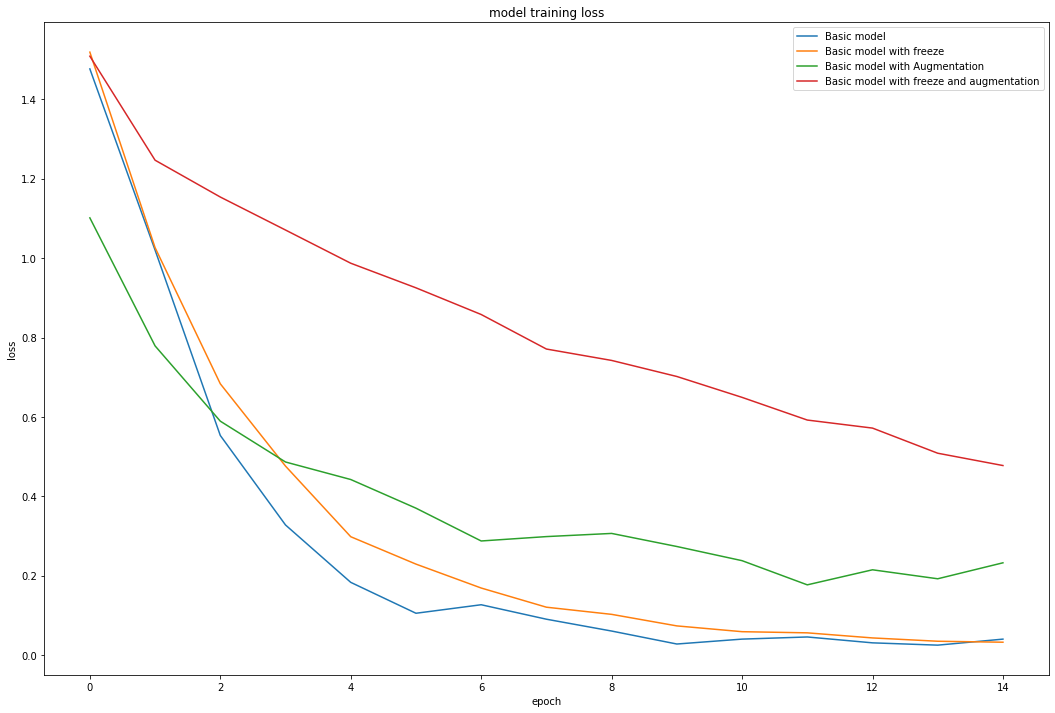

In [ ]:
plt.figure(figsize = (18,12))
plt.plot(history.history["loss"], label = 'Basic model')
plt.plot(history_freeze.history["loss"], label = 'Basic model with freeze')
plt.plot(history_aug.history["loss"], label = 'Basic model with Augmentation')
plt.plot(history_freeze_aug.history["loss"], label = 'Basic model with freeze and augmentation')
plt.title("model training loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

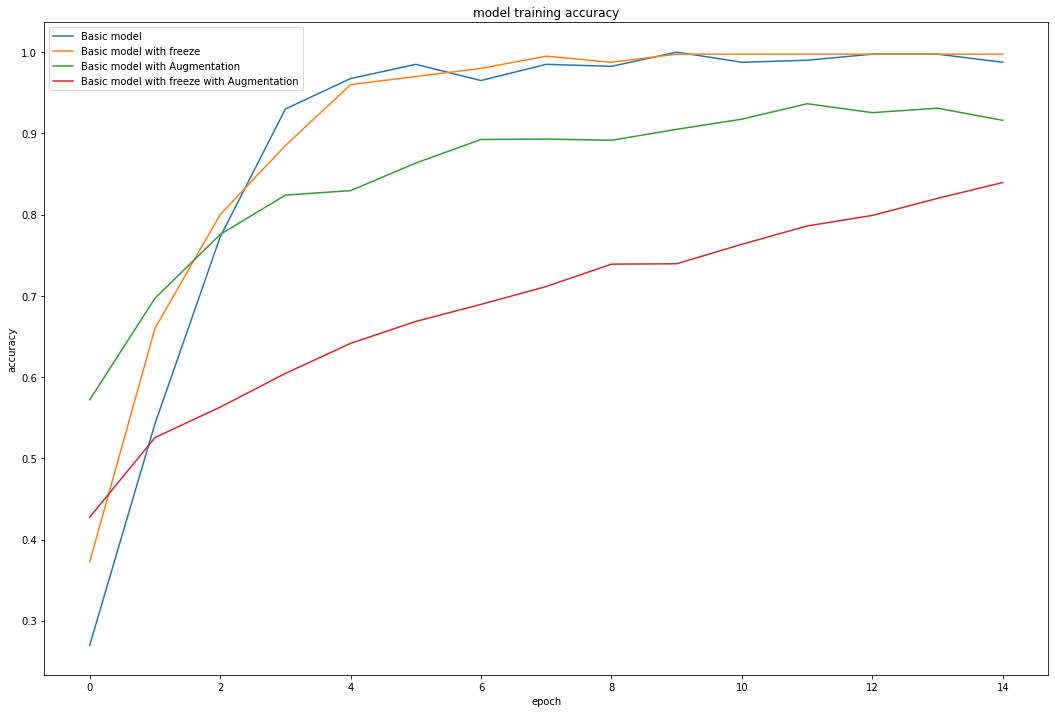

In [ ]:
plt.figure(figsize = (18,12))
plt.plot(history.history["accuracy"], label = 'Basic model')
plt.plot(history_freeze.history["accuracy"], label = 'Basic model with freeze')
plt.plot(history_aug.history["accuracy"], label = 'Basic model with Augmentation')
plt.plot(history_freeze_aug.history["accuracy"], label = 'Basic model with freeze with Augmentation')
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

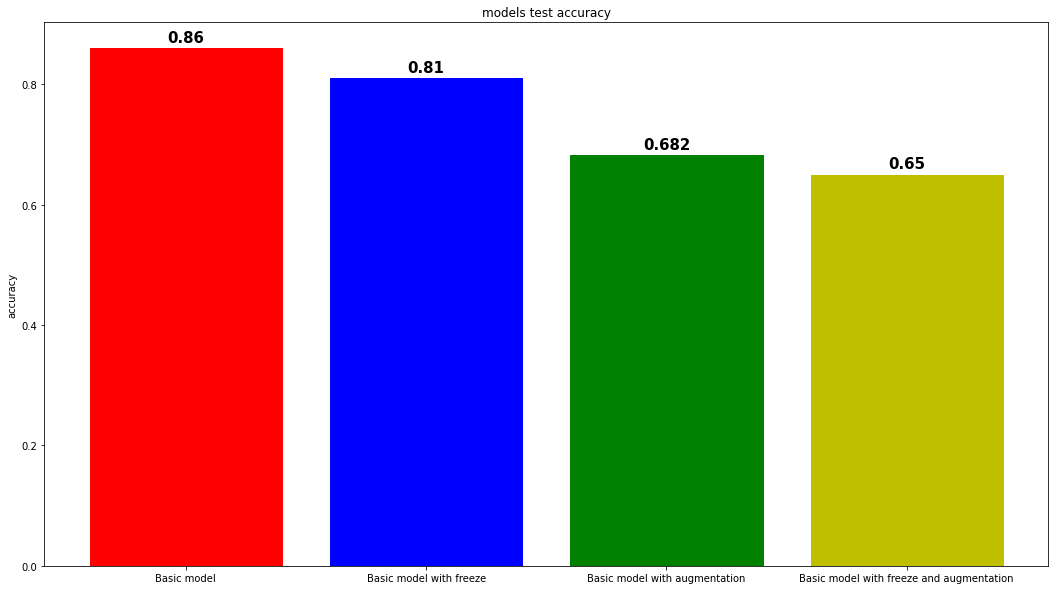

In [ ]:
plt.figure(figsize = (18,10))
names = ['Basic model','Basic model with freeze','Basic model with augmentation','Basic model with freeze and augmentation']
total = [scoreMLP[1], scoreMLP_freeze[1], scoreMLP_aug[1], scoreMLP_freeze_aug[1]]
bars = plt.bar(names,total)
plt.title("models test accuracy")
plt.ylabel("accuracy")
bars[0].set_color('r')
bars[1].set_color('b')
bars[2].set_color('g')
bars[3].set_color('y')
i = 1
j = 0.01
for i in range(len(total)):
    plt.annotate(round(total[i],3), (i, total[i]+j), fontweight='bold', ha = 'center', color = 'k', fontsize = 15)
plt.show()